<a href="https://colab.research.google.com/github/hamagami/is2021/blob/main/NN_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network implementation by scratch
This code is the simplest 3-layer neural network scratch code (no framework, just the algorithm). For a simpler implementation, please see the other sample code (implemented using the keras framework).

In [2]:
import numpy
import math
import random
from matplotlib import pyplot

### Neural Network class

In [5]:
class Neural:

    # constructor　3-layers
    def __init__(self, n_input, n_hidden, n_output):
        self.hidden_weight = numpy.random.random_sample((n_hidden, n_input + 1))
        self.output_weight = numpy.random.random_sample((n_output, n_hidden + 1))
        self.hidden_momentum = numpy.zeros((n_hidden, n_input + 1))
        self.output_momentum = numpy.zeros((n_output, n_hidden + 1))


# Training
    def train(self, X, T, epsilon, mu, epoch):
        self.error = numpy.zeros(epoch)
        N = X.shape[0]
        for epo in range(epoch):
            for i in range(N):
                x = X[i, :]
                t = T[i, :]

                self.__update_weight(x, t, epsilon, mu)

            self.error[epo] = self.__calc_error(X, T)

# Predict
    def predict(self, X):
        N = X.shape[0]
        C = numpy.zeros(N).astype('int')
        Y = numpy.zeros((N, X.shape[1]))
        for i in range(N):
            x = X[i, :]
            z, y = self.__forward(x)

            Y[i] = y
            C[i] = y.argmax()

        return (C, Y)

## Loss graph
    def error_graph(self):
        pyplot.ylim(0.0, 2.0)
        pyplot.plot(numpy.arange(0, self.error.shape[0]), self.error)
        pyplot.show()


# sigmoid func
    def __sigmoid(self, arr):
        return numpy.vectorize(lambda x: 1.0 / (1.0 + math.exp(-x)))(arr)

# FF
    def __forward(self, x):
        # z: output in hidden layer, y: output in output layer
        z = self.__sigmoid(self.hidden_weight.dot(numpy.r_[numpy.array([1]), x]))
        y = self.__sigmoid(self.output_weight.dot(numpy.r_[numpy.array([1]), z]))

        return (z, y)
    
## update
    def __update_weight(self, x, t, epsilon, mu):
        z, y = self.__forward(x)

        # update output_weight
        output_delta = (y - t) * y * (1.0 - y)
        _output_weight = self.output_weight
        self.output_weight -= epsilon * output_delta.reshape((-1, 1)) * numpy.r_[numpy.array([1]), z] - mu * self.output_momentum
        self.output_momentum = self.output_weight - _output_weight

        # update hidden_weight
        hidden_delta = (self.output_weight[:, 1:].T.dot(output_delta)) * z * (1.0 - z)
        _hidden_weight = self.hidden_weight
        self.hidden_weight -= epsilon * hidden_delta.reshape((-1, 1)) * numpy.r_[numpy.array([1]), x]
        self.hidden_momentum = self.hidden_weight - _hidden_weight

# loss func
    def __calc_error(self, X, T):
        N = X.shape[0]
        err = 0.0
        for i in range(N):
            x = X[i, :]
            t = T[i, :]

            z, y = self.__forward(x)
            err += (y - t).dot((y - t).reshape((-1, 1))) / 2.0

        return err

Parameters

In [6]:
# 
X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # input pattern 
T = numpy.array([[1, 0], [0, 1], [0, 1], [1, 0]]) # target pattern
N = X.shape[0] # number of data

input_size = X.shape[1]
hidden_size = 2
output_size = 2
epsilon = 0.1
mu = 0.9
epoch = 10000

## Main Process

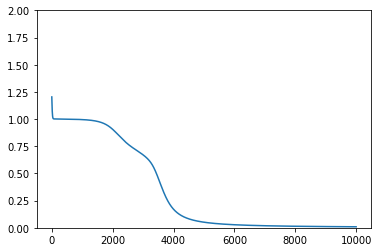

[0 0]
[0.94729417 0.05276445]
0
[0 1]
[0.0459863  0.95396595]
1
[1 0]
[0.04590595 0.95404635]
1
[1 1]
[0.95192243 0.04812511]
0


In [7]:
nn = Neural(input_size, hidden_size, output_size) # Generating neural network

nn.train(X, T, epsilon, mu, epoch) # training

nn.error_graph() # generate graph

C, Y = nn.predict(X) # predict

for i in range(N):
        x = X[i, :]
        y = Y[i, :]
        c = C[i]

        print(x)
        print(y)
        print(c)